https://dzen.ru/media/id/62f209e189f70109ff1e4e91/python-izvlekaem-istoricheskie-dannye-rossiiskih-akcii-62f356de6e5654155704d2eb

In [1]:
import requests
import apimoex
import pandas as pd

In [2]:
with requests.Session() as session:
    data = apimoex.get_board_history(session, 'GAZP')
    df = pd.DataFrame(data)
    df.set_index('TRADEDATE', inplace=True)
    print(df.head(), '\n')
    print(df.tail(), '\n')
    df.info()

           BOARDID   CLOSE    VOLUME         VALUE
TRADEDATE                                         
2014-06-09    TQBR  144.40  40347300  5.851239e+09
2014-06-10    TQBR  144.75  41460990  5.956067e+09
2014-06-11    TQBR  146.40  39418520  5.725373e+09
2014-06-16    TQBR  145.20  77165360  1.113453e+10
2014-06-17    TQBR  144.77  44370530  6.436430e+09 

           BOARDID   CLOSE    VOLUME         VALUE
TRADEDATE                                         
2023-02-08    TQBR  158.18  16688290  2.651242e+09
2023-02-09    TQBR  159.19  27661050  4.405527e+09
2023-02-10    TQBR  158.68   9874270  1.567193e+09
2023-02-13    TQBR  158.01  11418540  1.808640e+09
2023-02-14    TQBR  156.52  18614580  2.916539e+09 

<class 'pandas.core.frame.DataFrame'>
Index: 2192 entries, 2014-06-09 to 2023-02-14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BOARDID  2192 non-null   object 
 1   CLOSE    2174 non-null   float64
 2   VOLUME   

Решение №2

In [3]:
import datetime
import pandas_datareader

In [4]:
start_date = datetime.datetime(2019,10,31)
end_date = datetime.datetime.today()

In [5]:
code = 'GAZP'

In [6]:
data = pandas_datareader.DataReader(code, 'moex', start=start_date, end=end_date)
#print(data.tail(10))
print(data[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']].tail(10))

              OPEN    HIGH     LOW   CLOSE      VOLUME
TRADEDATE                                             
2023-02-01  158.30  158.66  157.54  158.12  14240340.0
2023-02-02  158.44  158.59  157.31  158.10  11991300.0
2023-02-03  158.09  163.96  156.76  160.87  69539880.0
2023-02-06  160.68  161.76  158.91  160.14  28144330.0
2023-02-07  160.50  161.35  159.51  159.87  13954930.0
2023-02-08  160.01  160.42  157.82  158.18  16688290.0
2023-02-09  158.50  160.44  157.60  159.19  27661050.0
2023-02-10  159.07  159.46  158.32  158.68   9874270.0
2023-02-13  159.47  159.47  158.00  158.01  11418540.0
2023-02-14  157.90  158.10  155.13  156.52  18614580.0


MEAN

In [7]:
data['Moving_average'] = data['CLOSE'].rolling(window=20, min_periods = 1, center = False).mean()
#data.tail(10)
print(data[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'Moving_average']].tail(10))

              OPEN    HIGH     LOW   CLOSE      VOLUME  Moving_average
TRADEDATE                                                             
2023-02-01  158.30  158.66  157.54  158.12  14240340.0        161.0290
2023-02-02  158.44  158.59  157.31  158.10  11991300.0        160.8740
2023-02-03  158.09  163.96  156.76  160.87  69539880.0        160.8125
2023-02-06  160.68  161.76  158.91  160.14  28144330.0        160.6840
2023-02-07  160.50  161.35  159.51  159.87  13954930.0        160.5725
2023-02-08  160.01  160.42  157.82  158.18  16688290.0        160.1900
2023-02-09  158.50  160.44  157.60  159.19  27661050.0        159.9410
2023-02-10  159.07  159.46  158.32  158.68   9874270.0        159.6470
2023-02-13  159.47  159.47  158.00  158.01  11418540.0        159.2575
2023-02-14  157.90  158.10  155.13  156.52  18614580.0        158.9670


<AxesSubplot: xlabel='TRADEDATE'>

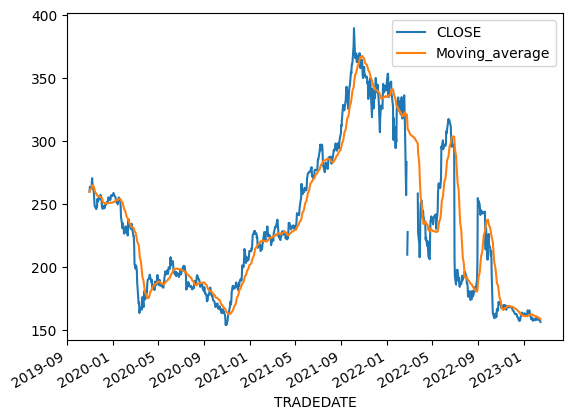

In [8]:
data[['CLOSE','Moving_average']].plot()

In [23]:
#14
#from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import yfinance as yf

import datetime
import pandas_datareader

In [24]:
start_date = datetime.datetime(2016,1,1)
end_date = datetime.datetime.today()

In [25]:
code = 'GAZP'

In [27]:
data = pandas_datareader.DataReader(code, 'moex', start=start_date, end=end_date)
#print(data.tail(10))
print(data[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']].tail(10))

              OPEN    HIGH     LOW   CLOSE      VOLUME
TRADEDATE                                             
2023-02-01  158.30  158.66  157.54  158.12  14240340.0
2023-02-02  158.44  158.59  157.31  158.10  11991300.0
2023-02-03  158.09  163.96  156.76  160.87  69539880.0
2023-02-06  160.68  161.76  158.91  160.14  28144330.0
2023-02-07  160.50  161.35  159.51  159.87  13954930.0
2023-02-08  160.01  160.42  157.82  158.18  16688290.0
2023-02-09  158.50  160.44  157.60  159.19  27661050.0
2023-02-10  159.07  159.46  158.32  158.68   9874270.0
2023-02-13  159.47  159.47  158.00  158.01  11418540.0
2023-02-14  157.90  158.10  155.13  156.52  18614580.0


In [28]:
#computation of returns
Stock = code
#data = yf.download(Stock, start="2016-01-01", end="2020-10-31")
T3= pd.DataFrame({"CLOSE":data["CLOSE"]})
T3['Year'] = T3.index.year
T2 = pd.DataFrame({"cumpnl_long":['0'], "cumpnl_short":['0'], "cumpnl":['0'], "SMA":['0'], "LMA":['0'], "Stock":['0'], "Year":['0']})
for z in range (2016, 2024, 1):
  T = T3.where(T3.Year == z)
  T = T.dropna()
  for x in range(1,35,2):
    for y in range(x,35,2):
      SMA=x
      LMA=y
      # Compute Moving averages of last 10 days and 30 days closing prices
      T['Short_average'] = T['CLOSE'].rolling(window=SMA, min_periods=1,center=False).mean()
      T['Long_average'] = T['CLOSE'].rolling(window=LMA, min_periods=1,center=False).mean()
      T['long_entry'] = T.Short_average > T.Long_average
      T['long_exit'] = T.Short_average <= T.Long_average
      T['positions_long'] = np.nan
      T.loc[T.long_entry,'positions_long'] = 1
      T.loc[T.long_exit,'positions_long'] = 0
      T.positions_long = T.positions_long.fillna(method='ffill')
      T['short_entry'] = T.Short_average < T.Long_average
      T['short_exit'] = T.Short_average >= T.Long_average
      T['positions_short'] = np.nan
      T.loc[T.short_entry,'positions_short'] = -1
      T.loc[T.short_exit,'positions_short'] = 0
      T.positions_short = T.positions_short.fillna(method='ffill')
      T['price_difference']= T.CLOSE - T.CLOSE.shift(1)
      T['pnllong'] = T.positions_long.shift(1) * T.price_difference
      T['pnlshort'] = T.positions_short.shift(1) * T.price_difference
      T['pnl'] = T['pnllong']+T['pnlshort']
      T['cumpnl_long'] = T.pnllong.cumsum()
      T['cumpnl_short'] = T.pnlshort.cumsum()
      T['cumpnl'] = T.pnl.cumsum()
      T1 = T[['cumpnl_short', 'cumpnl_long', 'cumpnl']].tail(1)
      T1['SMA'] = SMA
      T1['LMA'] = LMA
      T1['Stock'] = Stock
      T1['Year'] = z
      T2 = T2.append(T1)
print(T2)
# Pivot Table created
Pivot_Table1 = pd.pivot_table(T2, values ='cumpnl', index =['SMA', 'LMA'],
columns =['Year'], aggfunc = np.sum)
print (Pivot_Table1)



                    cumpnl_long cumpnl_short cumpnl SMA LMA Stock  Year
0                             0            0      0   0   0     0     0
2016-12-30 00:00:00         0.0          0.0    0.0   1   1  GAZP  2016
2016-12-30 00:00:00       24.44         6.34  30.78   1   3  GAZP  2016
2016-12-30 00:00:00        9.34        -8.76   0.58   1   5  GAZP  2016
2016-12-30 00:00:00       19.15         1.05   20.2   1   7  GAZP  2016
...                         ...          ...    ...  ..  ..   ...   ...
2023-02-14 00:00:00         0.0         1.49   1.49  29  31  GAZP  2023
2023-02-14 00:00:00         0.0         1.49   1.49  29  33  GAZP  2023
2023-02-14 00:00:00         0.0          0.0    0.0  31  31  GAZP  2023
2023-02-14 00:00:00         0.0          0.0    0.0  31  33  GAZP  2023
2023-02-14 00:00:00         0.0          0.0    0.0  33  33  GAZP  2023

[1225 rows x 7 columns]
Year      2016   2017   2018   2019   2020    2021    2022   2023    0
SMA LMA                                 

In [30]:
# Download of results in Excel
Pivot_Table1.to_csv("PV_T_rus.csv", index=True, encoding='utf8')

page # 19
PROBABILITY

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime
import pandas_datareader

In [7]:
start_date = datetime.datetime(2016,1,1)
end_date = datetime.datetime.today()

In [8]:
code = 'GAZP'

In [9]:
data = pandas_datareader.DataReader(code, 'moex', start=start_date, end=end_date)

In [11]:
data['buysignal'] = np.where((data['OPEN'] > data['CLOSE'].shift(+1)) &
(data['CLOSE'] > data['CLOSE'].shift(+1)), 1.0, 0.0)
data['sellsignal'] = np.where((data['OPEN'] < data['CLOSE'].shift(+1)) &
(data['CLOSE'] < data['CLOSE'].shift(+1)), -1.0, 0.0)
TotalSignal = data['buysignal'].sum() + (data['sellsignal'].sum()*-1)
Tradingdays = data['CLOSE'].count()
prob = (TotalSignal/Tradingdays)*100
print (Tradingdays)
print (TotalSignal)
print (prob)

1782
999.0
56.060606060606055


Из 1782 торговых дней 999.0.0 дней GAZP закрылись выше цены закрытия предыдущего дня, если
открылись выше цены закрытия предыдущего дня, и закрылись ниже цены закрытия
предыдущего дня, если открылись ниже цены закрытия предыдущего дня.
Вероятность = 56% Это означает,
что данные за 2020 год говорят о том, что существует 56% вероятность того, что GAZP закроется
выше цены закрытия предыдущего дня, если откроется выше цены закрытия предыдущего дня,
а HDFC закроется ниже цены закрытия предыдущего дня, если откроется ниже предыдущей. цена
закрытия дня

In [12]:
data['buyqty'] = np.where((data['LOW'] < data['CLOSE'].shift(+1)),(data['CLOSE']-data['CLOSE'].shift(+1))*data['buysignal'], 0.0)
data['sellqty'] = np.where((data['HIGH'] > data['CLOSE'].shift(+1)), (data['CLOSE'].shift(+1) - data['CLOSE'])*(data['sellsignal']*-1), 0.0)
data['profit'] = data['buyqty'] + data['sellqty']
Totalprofit = data['profit'].sum()
print(Totalprofit)

1087.3399999999997


Выход вышеуказанной программы составляет 1551. Это означает, что трейдер заработает 1551 рупию за
акцию за 10 месяцев, если он будет торговать по вышеуказанной внутридневной стратегии. Если трейдер
торгует деривативными контрактами, то прибыль, полученная им, составляет 4 65 300 рупий за лот за первые
10 месяцев 2020 года (1551 умножить на размер лота 300).

page #27 / BOLLINGER BAND

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime
import pandas_datareader

In [2]:
start_date = datetime.datetime(2016,1,1)
end_date = datetime.datetime.today()

code = 'GAZP'

data = pandas_datareader.DataReader(code, 'moex', start=start_date, end=end_date)

In [7]:
T3 = pd.DataFrame({"CLOSE": data["CLOSE"]})
T3['Year'] = T3.index.year
T2 = pd.DataFrame({"cumpnl":['0'], "MA":['0'], "STD":['0'], "Stock":['0'],
"Year":['0']})
for z in range (2016, 2024, 1):
    T = T3.where(T3.Year == z)
    T = T.dropna()
    for x in range(1,37,2):
        for y in range(1,3,1):
            MA=x
            STD=y
            T['moving_average'] = T.CLOSE.rolling(MA).mean()
            T['moving_std_dev'] = T.CLOSE.rolling(MA).std()
            T['upper_band'] = T.moving_average + (T.moving_std_dev*STD)
            T['lower_band'] = T.moving_average - (T.moving_std_dev*STD)
            T['long_entry'] = T.CLOSE < T.lower_band
            T['long_exit'] = T.CLOSE >= T.moving_average
            T['positions_long'] = np.nan
            T.loc[T.long_entry,'positions_long'] = 1
            T.loc[T.long_exit,'positions_long'] = 0
            T.positions_long = T.positions_long.fillna(method='ffill')
            T['short_entry'] = T.CLOSE > T.upper_band
            T['short_exit'] = T.CLOSE <= T.moving_average
            T['positions_short'] = np.nan
            T.loc[T.short_entry,'positions_short'] = -1
            T.loc[T.short_exit,'positions_short'] = 0
            T.positions_short = T.positions_short.fillna(method='ffill')
            T['positions'] = T.positions_long + T.positions_short
            T['price_difference']= T.CLOSE - T.CLOSE.shift(1)
            T['pnl'] = T.positions.shift(1) * T.price_difference
            T['cumpnl'] = T.pnl.cumsum()
            T1 = T[['cumpnl']].tail(1)
            T1['MA'] = MA
            T1['STD'] = STD
            T1['Stock'] = code
            T1['Year'] = z
            T2 = T2.append(T1)
print(T2)

                    cumpnl  MA STD Stock  Year
0                        0   0   0     0     0
2016-12-30 00:00:00    0.0   1   1  GAZP  2016
2016-12-30 00:00:00    0.0   1   2  GAZP  2016
2016-12-30 00:00:00 -21.24   3   1  GAZP  2016
2016-12-30 00:00:00    0.0   3   2  GAZP  2016
...                    ...  ..  ..   ...   ...
2023-02-20 00:00:00   0.15  31   2  GAZP  2023
2023-02-20 00:00:00  -0.32  33   1  GAZP  2023
2023-02-20 00:00:00  -0.32  33   2  GAZP  2023
2023-02-20 00:00:00    NaN  35   1  GAZP  2023
2023-02-20 00:00:00    NaN  35   2  GAZP  2023

[289 rows x 5 columns]


In [8]:
Pivot_Table1 = pd.pivot_table(T2, values ='cumpnl', index =['MA', 'STD'],
columns =['Year'], aggfunc = np.sum)
print (Pivot_Table1)

Year     2016   2017   2018   2019   2020   2021    2022  2023    0
MA STD                                                             
1  1      0.0    0.0    0.0    0.0    0.0    0.0     0.0   0.0  NaN
   2      0.0    0.0    0.0    0.0    0.0    0.0     0.0   0.0  NaN
3  1   -21.24 -44.82  22.99 -34.03 -51.91 -23.68   98.95  0.99  NaN
   2      0.0    0.0    0.0    0.0    0.0    0.0     0.0   0.0  NaN
5  1    23.29 -37.84   6.28 -48.52 -78.05 -20.18  -225.8  -2.0  NaN
   2      0.0    0.0    0.0    0.0    0.0    0.0     0.0   0.0  NaN
7  1     7.68 -27.71   0.92 -37.73  -68.4 -24.25 -276.11 -1.83  NaN
   2      4.1 -13.13  19.35 -30.65 -57.48  31.94  -36.34  2.84  NaN
9  1     8.89  -9.85   3.72 -22.95 -93.55 -50.19 -300.61  3.22  NaN
   2     6.78 -13.18  17.65 -33.47 -50.95  28.94 -110.29  2.84  NaN
11 1    14.64  -12.6  31.61 -20.66 -91.92 -44.56 -262.61 -0.25  NaN
   2     19.6   -7.6   11.8  -66.3 -20.52   4.36 -112.88  2.84  NaN
13 1    10.98 -13.29  43.75 -25.31 -82.21 -38.59